In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import math

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier as MLP
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
rand_state = 2022

from util import *

In [3]:
df_raw = pd.read_csv('data/stroke.csv').rename(columns={'stroke':'y'})
df_raw.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,y
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df_raw['y'].value_counts()

0    4733
1     248
Name: y, dtype: int64

In [5]:
data = preprocess(df_raw
                  , cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
                  , num_cols = ['age','avg_glucose_level','bmi'])

train roc_auc score: [0.76376506 0.81829614 0.82908591 0.91257088 0.94259749 0.96332828
 1.        ]
test roc_auc score: [0.75680985 0.80641995 0.79186501 0.74738938 0.70853973 0.66727557
 0.60266367]


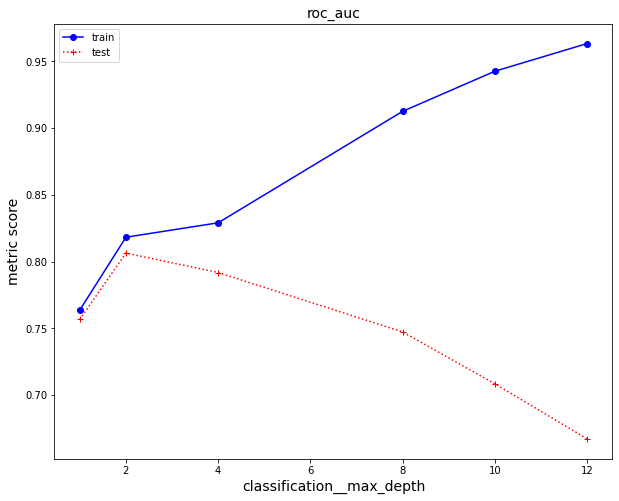

train neg_log_loss score: [-5.30937426e-01 -5.01956084e-01 -4.69781791e-01 -3.62612430e-01
 -2.92553335e-01 -2.30914497e-01 -9.99200722e-16]
test neg_log_loss score: [-0.52758945 -0.50295479 -0.51340054 -0.95792848 -1.54144758 -2.23431517
 -5.15194261]


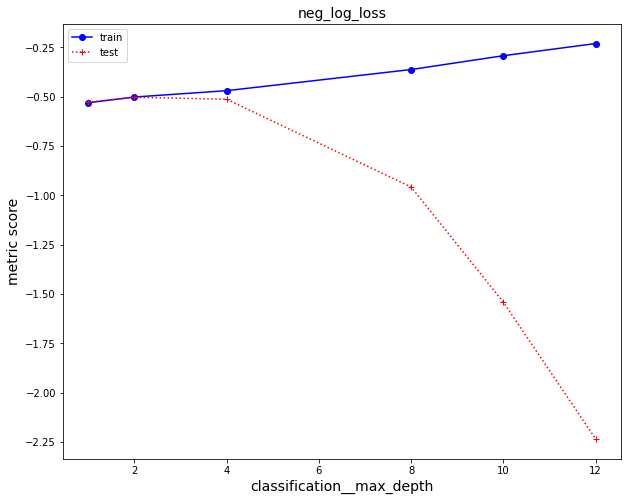

mean fit time: [0.01527996 0.01563087 0.01875243 0.02500167 0.0320456  0.03301435
 0.0361331 ]


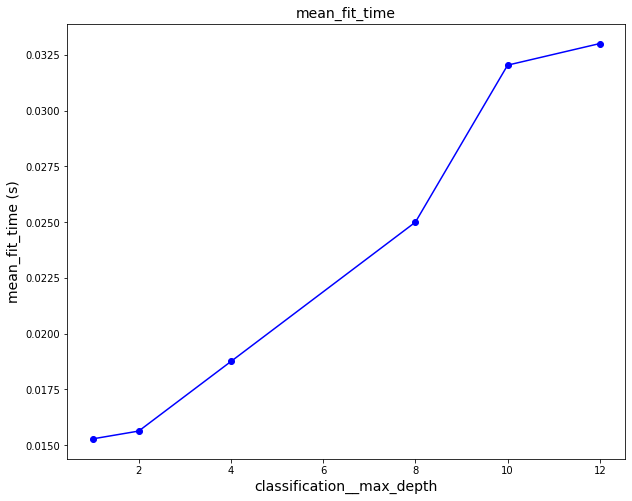

In [10]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', DTC())
    ])
train_test(data, model, {'classification__max_depth':[1,2,4,8,10,12,None]})

# tree

train roc_auc score: [0.72613517 0.81390275 0.8600472  0.94668984 0.97759099 0.99251323
 1.        ]
test roc_auc score: [0.726101   0.79576935 0.81485194 0.7406237  0.67591452 0.61430876
 0.54444626]


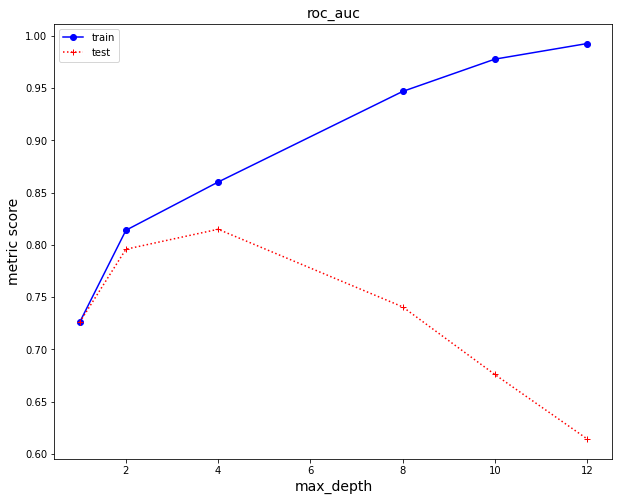

train neg_log_loss score: [-1.73058836e-01 -1.61508638e-01 -1.49159776e-01 -9.82690181e-02
 -6.47599950e-02 -3.76952452e-02 -9.99200722e-16]
test neg_log_loss score: [-0.1732057  -0.16733802 -0.24023052 -1.04618313 -1.72598912 -2.44169069
 -3.32145042]


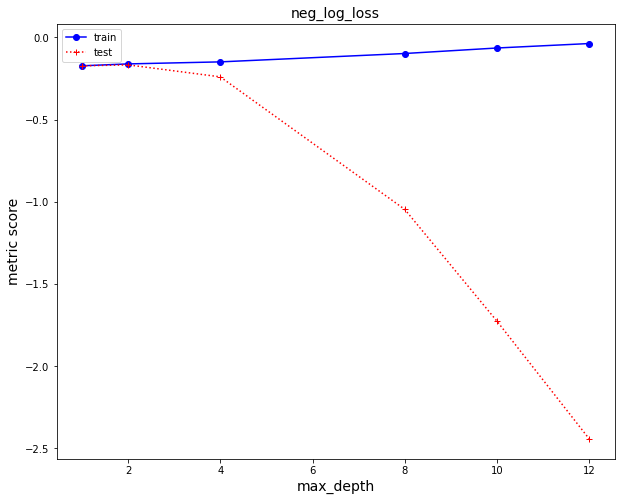

mean fit time: [0.00399985 0.00479951 0.00679941 0.00900006 0.01059723 0.0139987
 0.01139593]


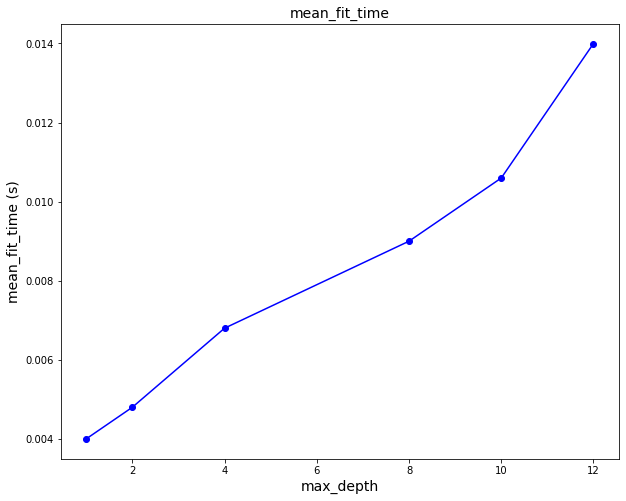

In [448]:
train_test(data, DTC(), {'max_depth':[1,2,4,8,10,12,None]})

# svc

train roc_auc score: [0.83934181 0.87332191 0.88289559]
test roc_auc score: [0.82801752 0.70953576 0.74970159]


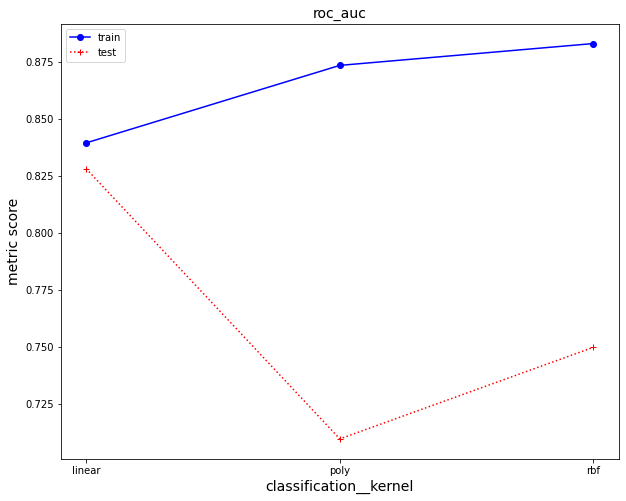

train neg_log_loss score: [-0.49800961 -0.40951058 -0.38911619]
test neg_log_loss score: [-0.50217352 -0.48731744 -0.44574062]


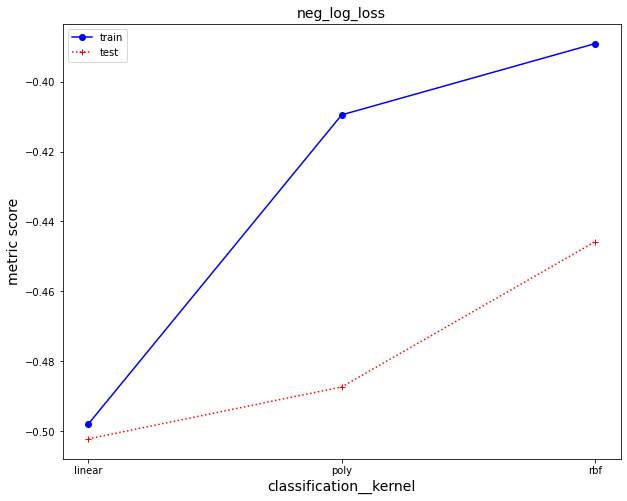

mean fit time: [6.38687673 6.71123891 8.11545343]


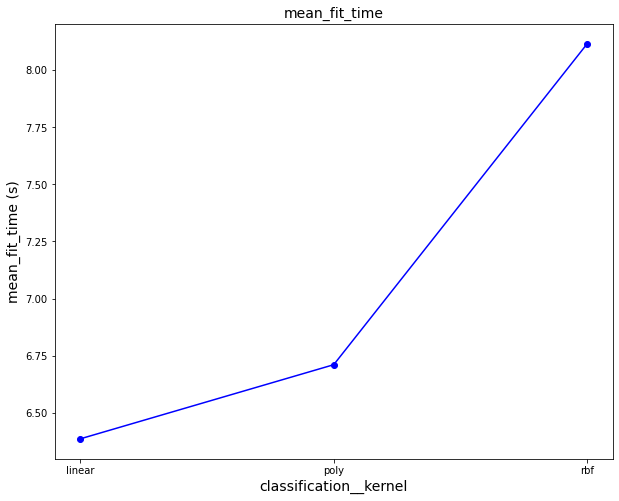

In [7]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', SVC(probability = True))
    ])

train_test(data, model, {'classification__kernel':['linear', 'poly', 'rbf']})

train roc_auc score: [0.84699644 0.87356974 0.92044814 0.9559931  0.96675431]
test roc_auc score: [0.7757757  0.70873358 0.61850776 0.54606063 0.50939037]


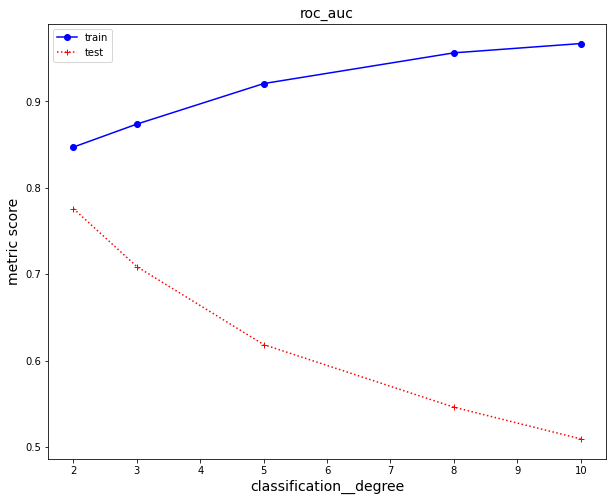

train neg_log_loss score: [-0.4617384  -0.41169268 -0.32843007 -0.25265084 -0.23990257]
test neg_log_loss score: [-0.4925015  -0.48642431 -0.50059826 -0.58975185 -0.6559364 ]


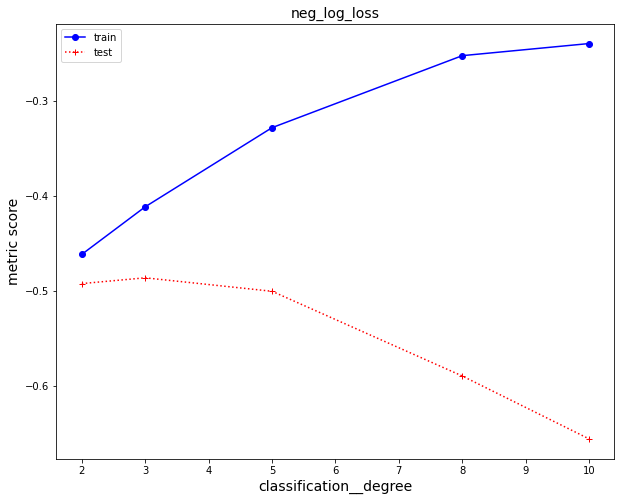

mean fit time: [ 6.48222113  6.7876298   7.21811943 10.64927473 21.126724  ]


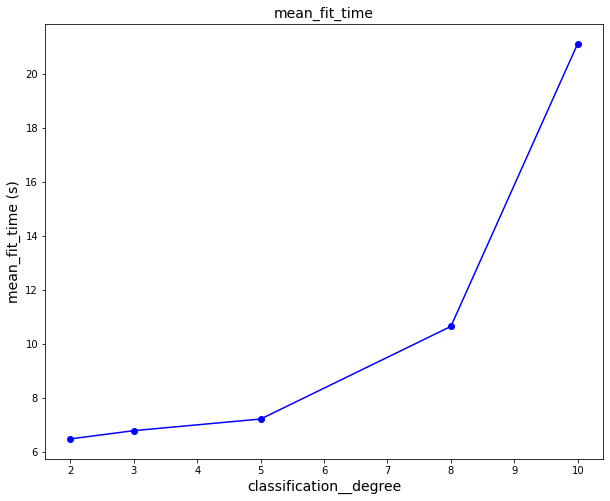

In [12]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', SVC(kernel = 'poly',probability = True))
    ])

train_test(data, model, {'classification__degree':[2,3,5,8,10]})

train roc_auc score: [0.39027075 0.79647361 0.90734257]
test roc_auc score: [0.38261118 0.59576096 0.63812177]


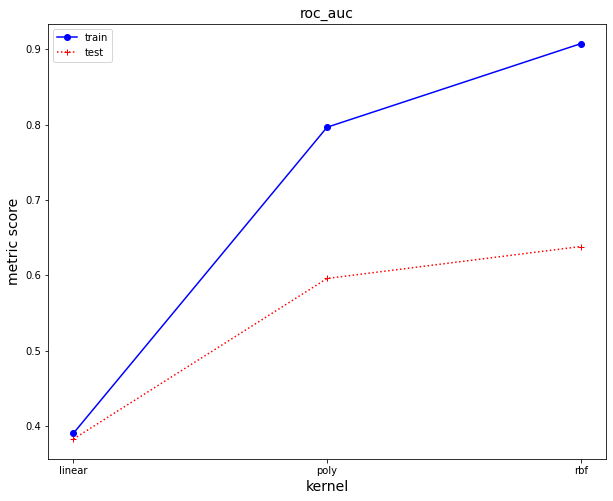

train neg_log_loss score: [-0.21214856 -0.19000398 -0.17845508]
test neg_log_loss score: [-0.21225417 -0.19700146 -0.19272047]


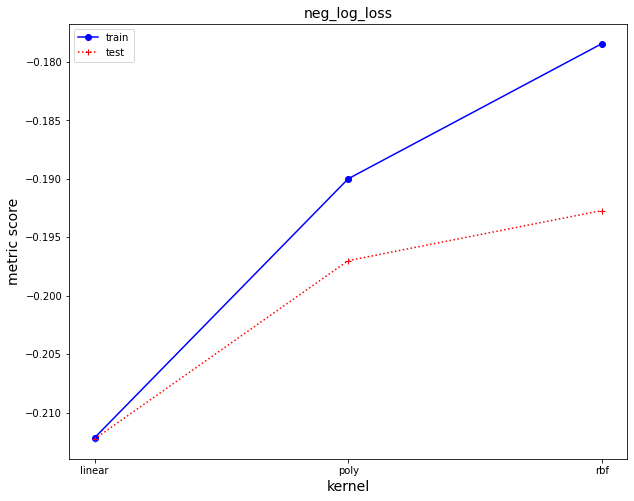

mean fit time: [0.2390985  1.46424098 1.11490145]


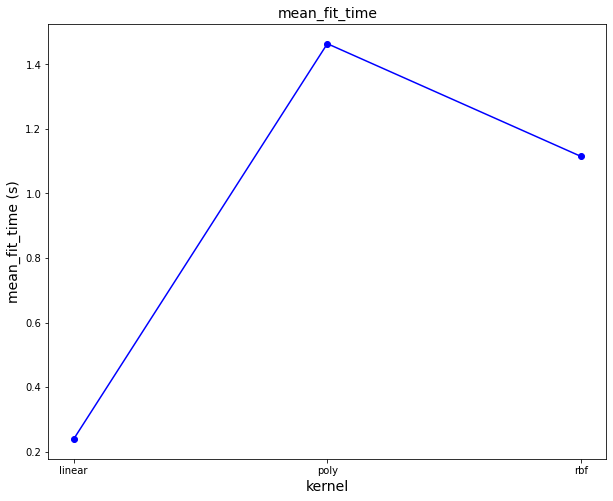

In [451]:
train_test(data, SVC(probability = True), {'kernel':['linear', 'poly', 'rbf']})

train roc_auc score: [0.63072557 0.79647361 0.90087063 0.93373727 0.95111203]
test roc_auc score: [0.57323732 0.59576096 0.56398821 0.47519688 0.44265393]


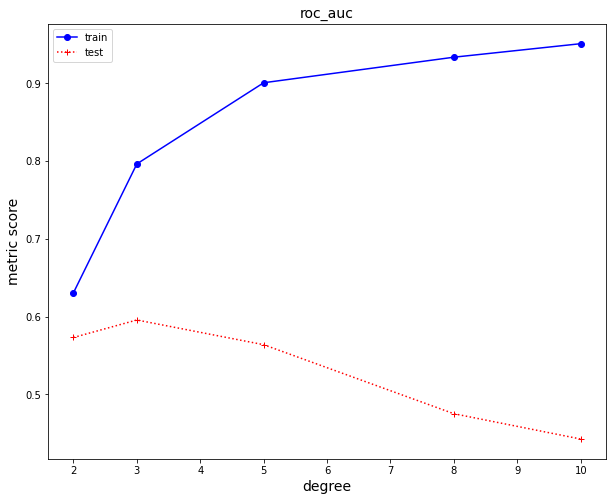

train neg_log_loss score: [-0.19400689 -0.18856726 -0.18890737 -0.20478532 -0.20565117]
test neg_log_loss score: [-0.19773892 -0.19792373 -0.19965485 -0.19614165 -0.19498896]


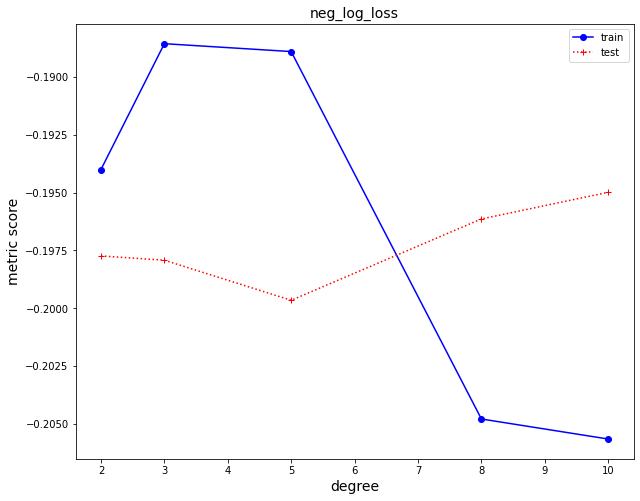

mean fit time: [1.18220448 1.39004254 1.41517873 2.08099999 3.76385446]


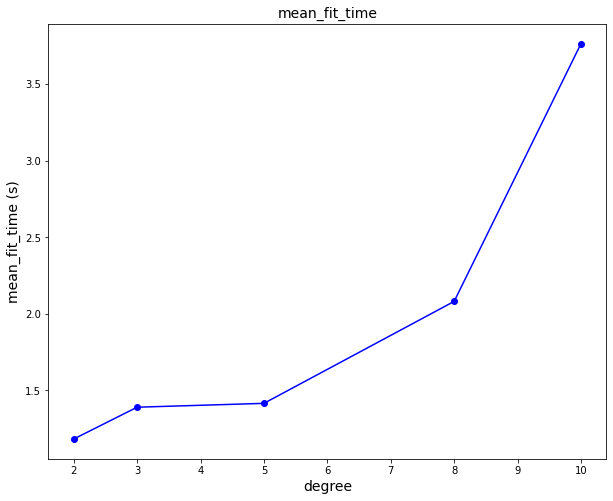

In [452]:
train_test(data, SVC(kernel = 'poly',probability = True), {'degree':[2,3,5,8,10]})

# knn

train roc_auc score: [0.97842385 0.96010658 0.91809853 0.87296006 0.85157892 0.8351681
 0.81273299 0.79486816 0.78152325]
test roc_auc score: [0.63412144 0.66043378 0.69921931 0.71994721 0.72466476 0.7292247
 0.735621   0.76327871 0.7610049 ]


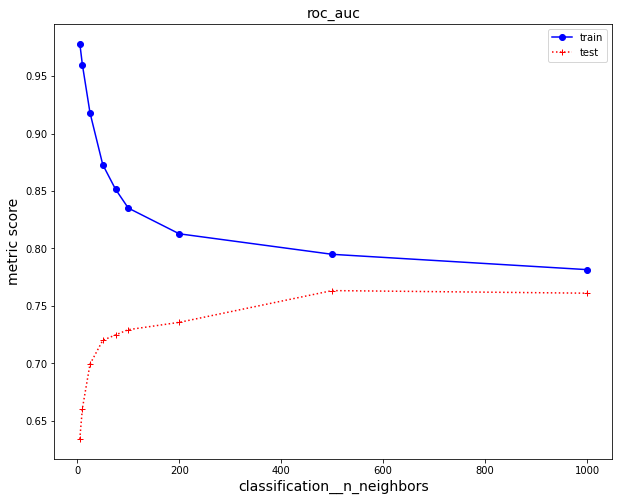

train neg_log_loss score: [-0.24018139 -0.35507957 -0.46146801 -0.51324551 -0.53886624 -0.55704688
 -0.57460279 -0.58504493 -0.60657991]
test neg_log_loss score: [-3.12799387 -1.99359867 -0.91250043 -0.69182376 -0.61650087 -0.59579882
 -0.59436536 -0.58839189 -0.60868594]


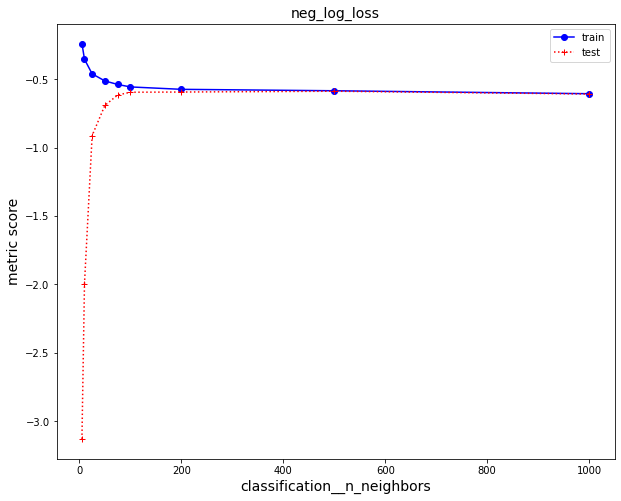

mean fit time: [0.03722878 0.03125014 0.03437567 0.03750172 0.03127017 0.03437052
 0.03353739 0.03125324 0.03141775]


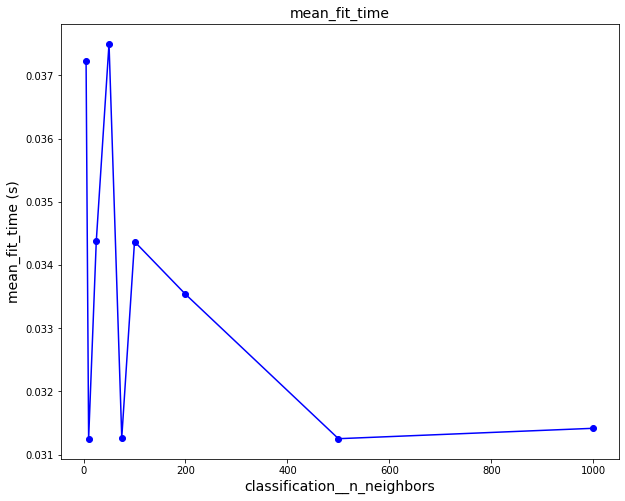

In [13]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', KNNC())
    ])

train_test(data, model, {'classification__n_neighbors':[5,10, 25,50,75,100,200, 500, 1000]})

train roc_auc score: [0.93647979 0.90303142 0.86361473 0.82739807 0.81090592 0.81234054
 0.80148101 0.78985207 0.78043236]
test roc_auc score: [0.59004039 0.6370092  0.71704401 0.7259691  0.73852926 0.75068173
 0.77275276 0.77053626 0.77257228]


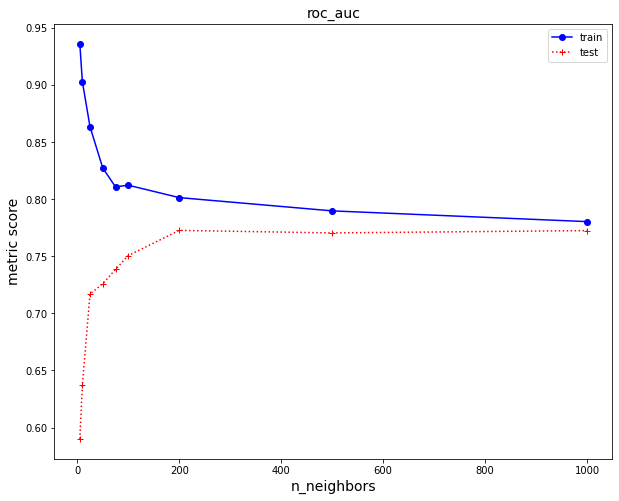

train neg_log_loss score: [-0.10720106 -0.1287931  -0.14880616 -0.161908   -0.16682454 -0.1682673
 -0.17186356 -0.17651612 -0.18100238]
test neg_log_loss score: [-1.15978814 -0.86700221 -0.42600616 -0.29387421 -0.22054231 -0.20154332
 -0.18764172 -0.18443585 -0.18171068]


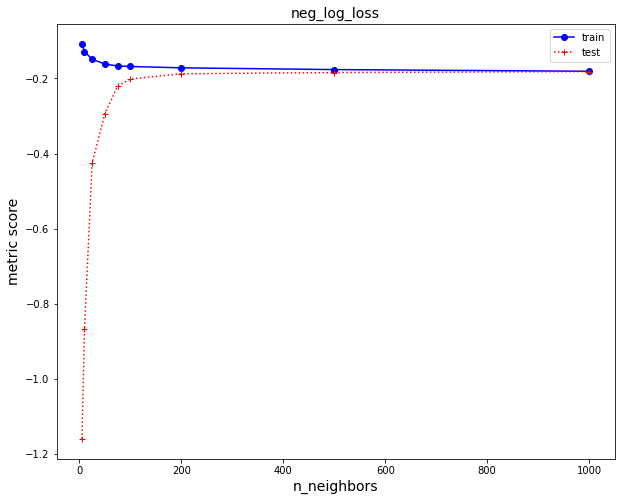

mean fit time: [0.02140322 0.02140059 0.02079382 0.02100248 0.02099829 0.02099891
 0.02199531 0.02100329 0.02080712]


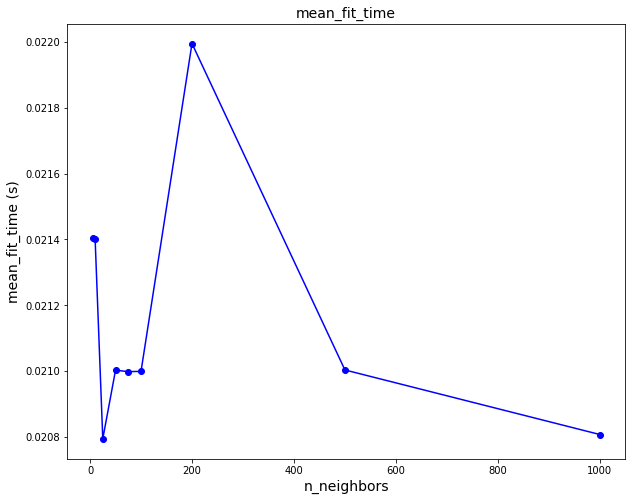

In [453]:
train_test(data, KNNC(), {'n_neighbors':[5,10, 25,50,75,100,200, 500, 1000]})

# boost tree

train roc_auc score: [0.8461308  0.85143721 0.86722506 0.87462855 0.87962324 0.90752736]
test roc_auc score: [0.82228547 0.82298836 0.81454177 0.80257674 0.79313004 0.7686205 ]


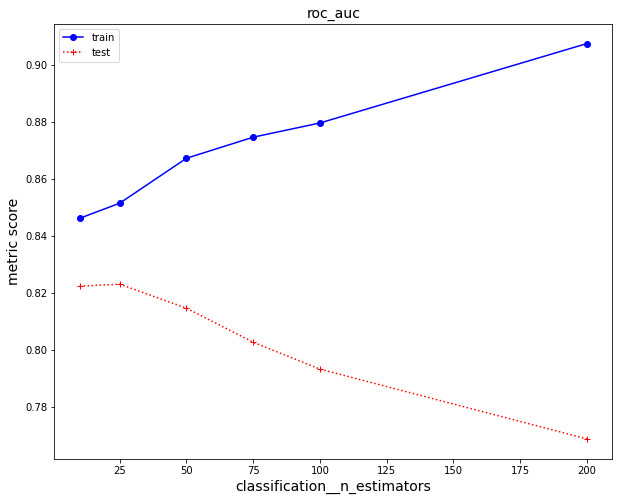

train neg_log_loss score: [-0.50467152 -0.44965399 -0.39761776 -0.36449226 -0.33854694 -0.26153481]
test neg_log_loss score: [-0.51009087 -0.45962853 -0.41973106 -0.39274867 -0.37225588 -0.3145249 ]


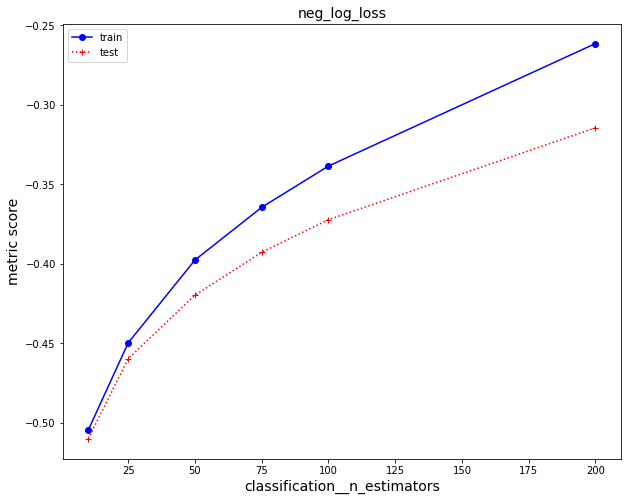

mean fit time: [0.08551564 0.19845543 0.37857847 0.57887053 0.76715946 1.53068013]


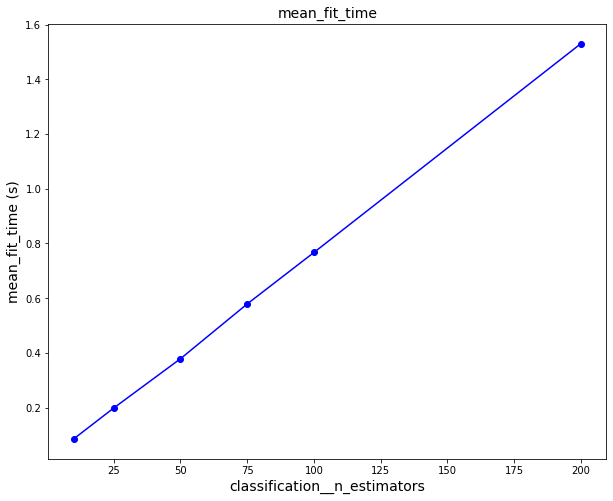

In [14]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', GBC())
    ])

train_test(data, model, {'classification__n_estimators':[10, 25, 50, 75, 100, 200]})

train roc_auc score: [0.87082471 0.89078181 0.9096115  0.92355656 0.93462031 0.96325042]
test roc_auc score: [0.82505408 0.83108665 0.82619405 0.82236256 0.8213632  0.81209857]


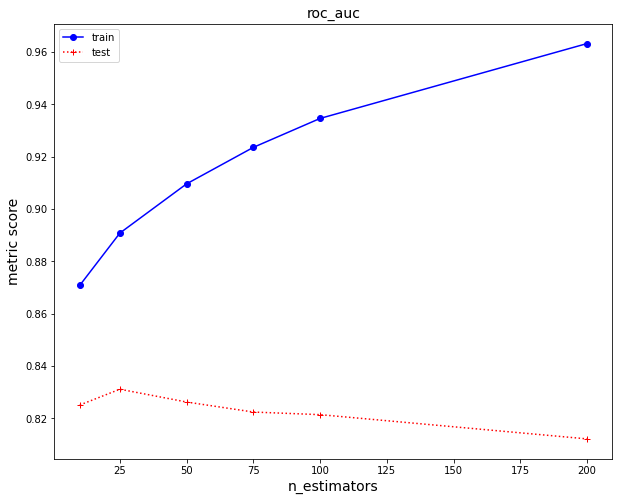

train neg_log_loss score: [-0.15742165 -0.14317802 -0.13208894 -0.12400217 -0.11669767 -0.09411505]
test neg_log_loss score: [-0.16943316 -0.16543858 -0.16633226 -0.16837712 -0.16918451 -0.17588329]


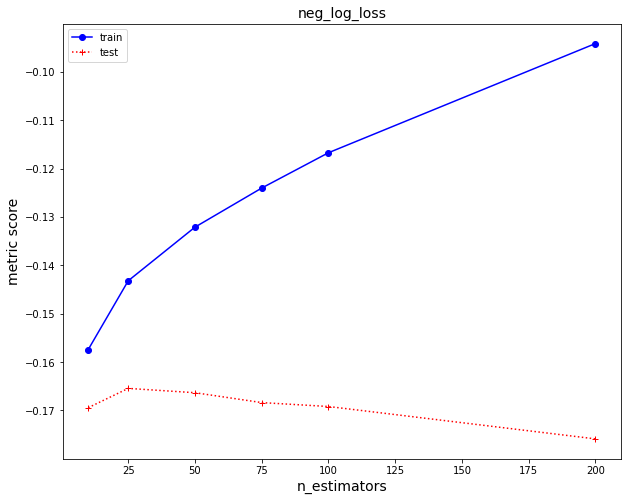

mean fit time: [0.04040327 0.09739957 0.18347611 0.27503223 0.36235247 0.75266438]


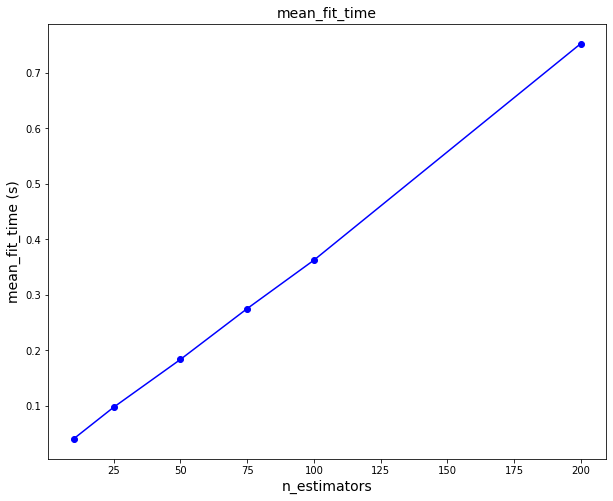

In [454]:
train_test(data, GBC(), {'n_estimators':[10, 25, 50, 75, 100, 200]})

train roc_auc score: [0.85094805 0.852808   0.85167011 0.85044572 0.8527723  0.85174444]
test roc_auc score: [0.82474891 0.82052358 0.8202109  0.82071005 0.82160349 0.82515775]


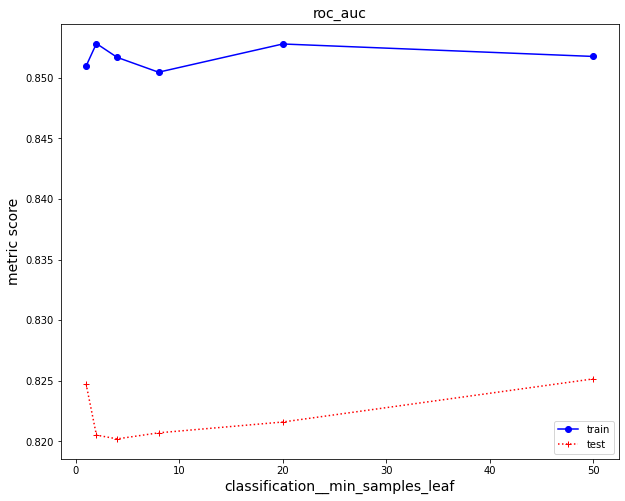

train neg_log_loss score: [-0.44676578 -0.44883543 -0.44916024 -0.447593   -0.44632851 -0.45105893]
test neg_log_loss score: [-0.45809654 -0.45894836 -0.46080086 -0.45808242 -0.45644789 -0.46074017]


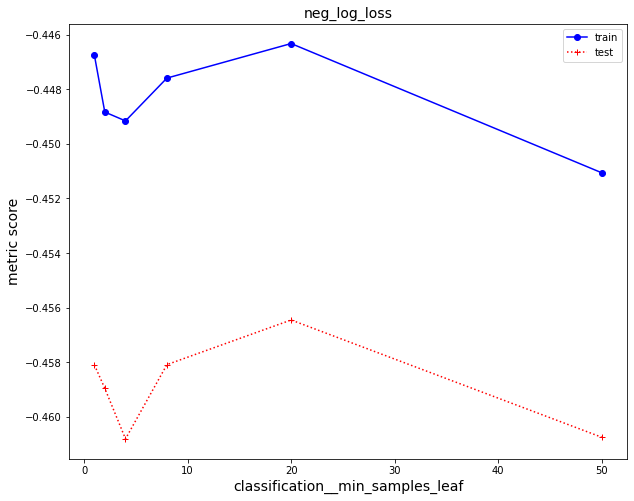

mean fit time: [0.1947372  0.19673815 0.19792547 0.18547773 0.189642   0.18734937]


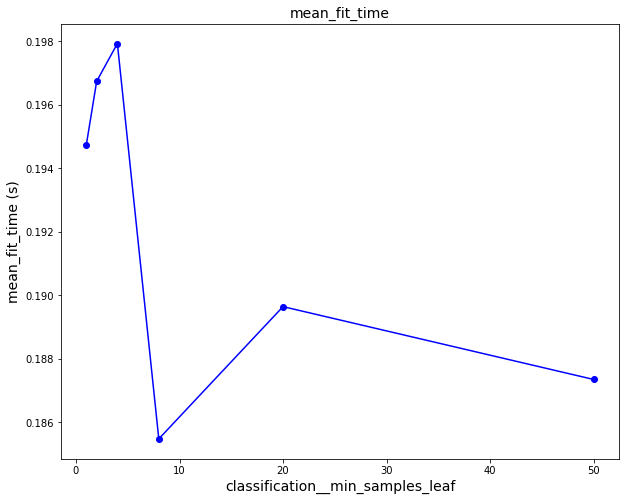

In [15]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', GBC())
    ])

train_test(data, model, {'classification__n_estimators':[25],'classification__min_samples_leaf':[1,2,4,8,20,50]})

train roc_auc score: [0.89078181 0.89020804 0.8901085  0.89107548 0.88759929 0.88642386]
test roc_auc score: [0.83106142 0.83170226 0.8318647  0.83178339 0.83082938 0.83153995]


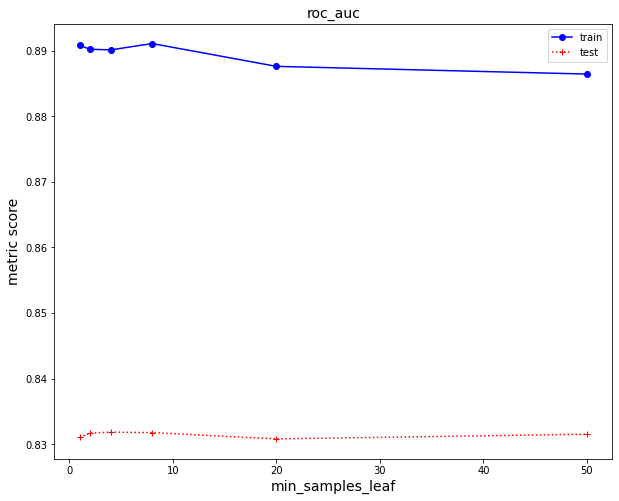

train neg_log_loss score: [-0.14317802 -0.14386587 -0.14429869 -0.14424269 -0.14576011 -0.14657671]
test neg_log_loss score: [-0.16535598 -0.1649527  -0.16456111 -0.16450178 -0.16480781 -0.1644436 ]


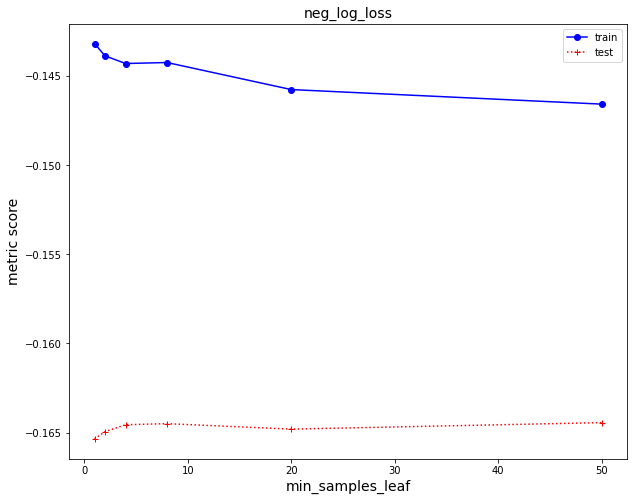

mean fit time: [0.09516172 0.0950263  0.09359937 0.0928422  0.09045482 0.09022603]


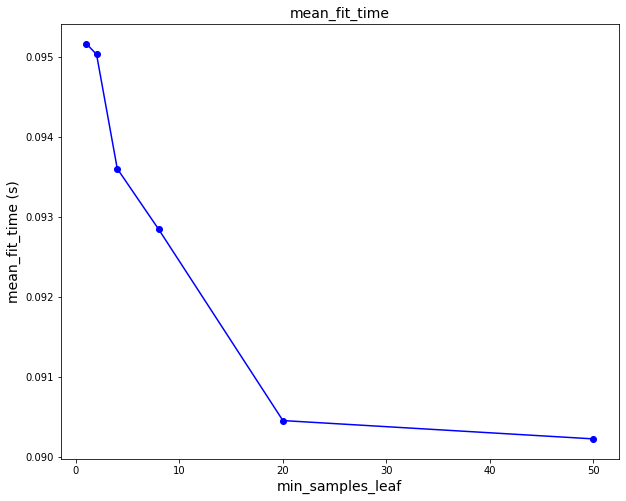

In [455]:
train_test(data, GBC(), {'n_estimators':[25],'min_samples_leaf':[1,2,4,8,20,50]})

train roc_auc score: [0.83522842 0.84019513 0.85095408 0.86678557 0.99208939 1.        ]
test roc_auc score: [0.82581366 0.82207938 0.82496198 0.81754389 0.81105025 0.71853555]


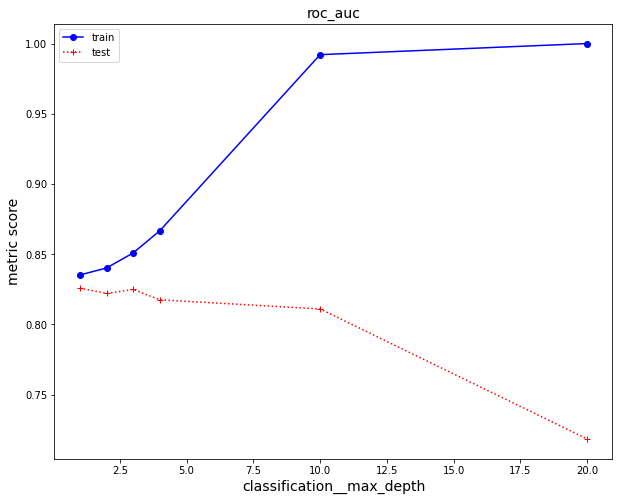

train neg_log_loss score: [-0.50012046 -0.47495731 -0.44899878 -0.41706472 -0.19686763 -0.047982  ]
test neg_log_loss score: [-0.50178897 -0.4810369  -0.45889339 -0.43479219 -0.30787478 -0.39800694]


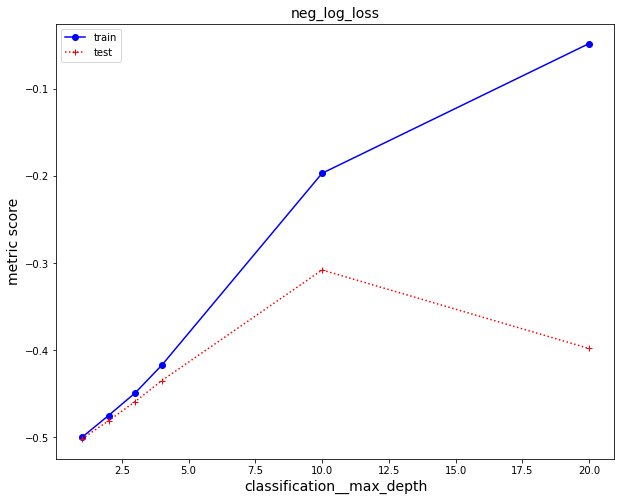

mean fit time: [0.08766198 0.14395194 0.19580336 0.24895887 0.76544709 1.34953299]


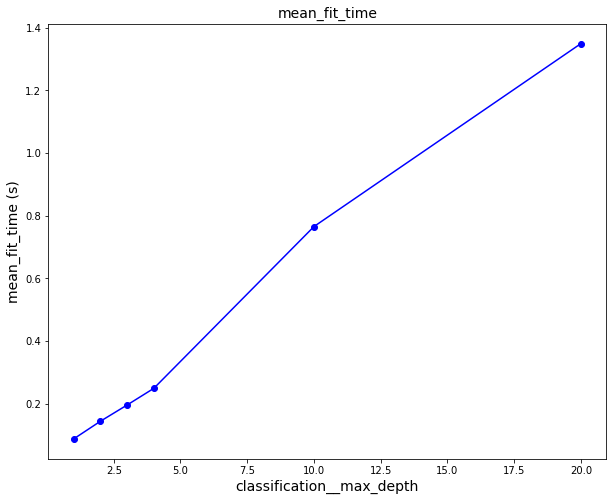

In [16]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', GBC())
    ])

train_test(data, model, {'classification__n_estimators':[25],'classification__max_depth':[1,2,3,4,10,20]})

train roc_auc score: [0.84301024 0.86246583 0.89078181 0.92448601 1.         1.        ]
test roc_auc score: [0.82761501 0.83302718 0.83057003 0.82905515 0.79997098 0.53930541]


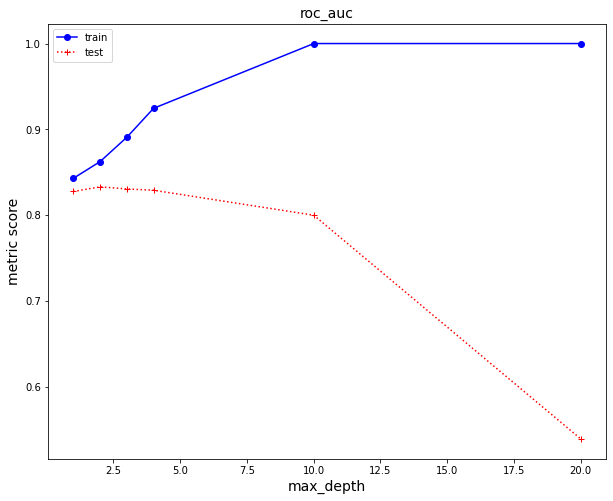

train neg_log_loss score: [-0.16091381 -0.15437523 -0.14317802 -0.12732809 -0.02056628 -0.00705125]
test neg_log_loss score: [-0.16459392 -0.16402399 -0.16591099 -0.16713942 -0.21172203 -0.33686825]


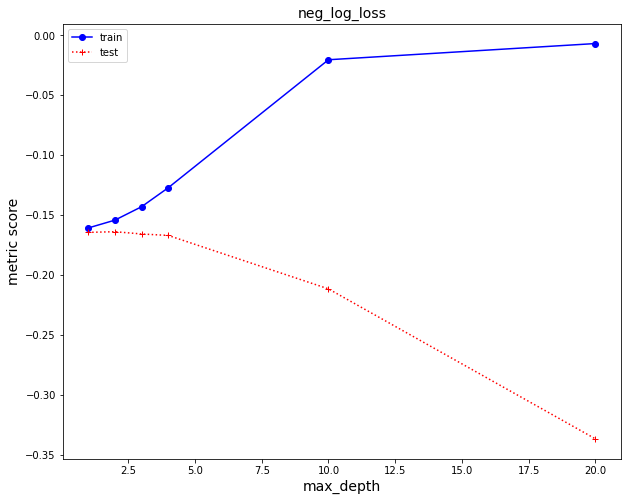

mean fit time: [0.04439816 0.06884842 0.09519849 0.12242599 0.45075336 0.57385821]


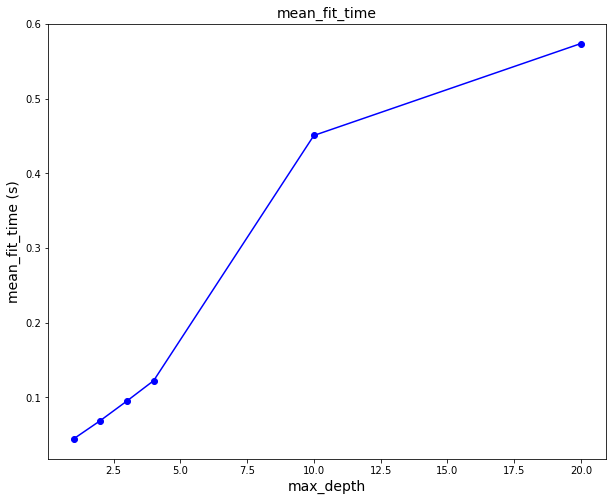

In [456]:
train_test(data, GBC(), {'n_estimators':[25],'max_depth':[1,2,3,4,10,20]})

# NN

train roc_auc score: [0.84785402 0.86836323 0.89168294 0.91428884 0.93090871]
test roc_auc score: [0.80300454 0.78943738 0.75273439 0.7204942  0.72097909]


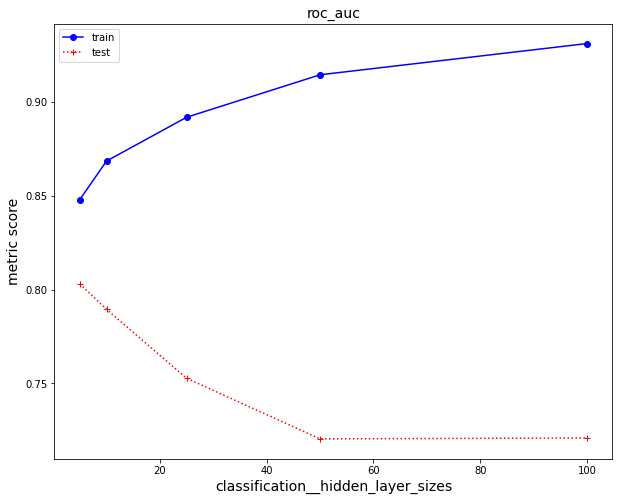

train neg_log_loss score: [-0.46149293 -0.43263744 -0.36516663 -0.32559546 -0.29050061]
test neg_log_loss score: [-0.48369709 -0.47100691 -0.45003527 -0.46194072 -0.44604216]


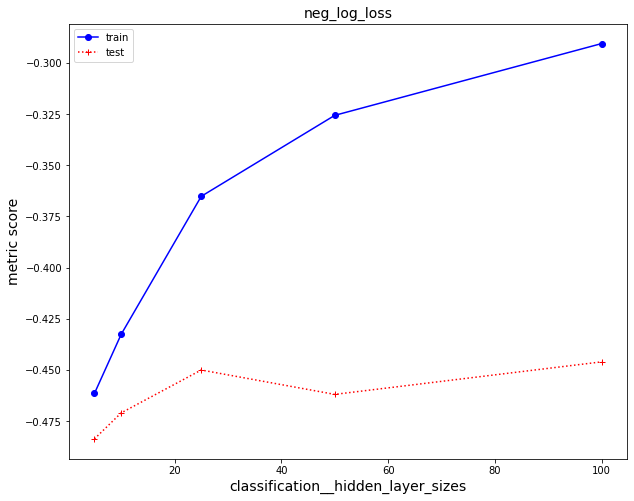

mean fit time: [ 3.56814923  6.40354619  8.89559445 14.05441322 13.42613697]


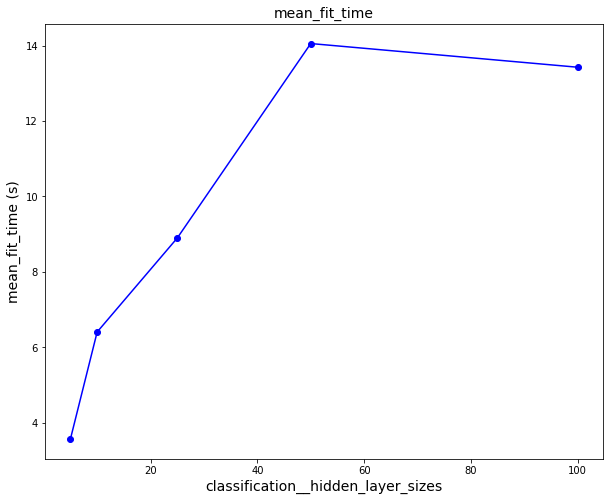

In [17]:
model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', MLP())
    ])

train_test(data, model,{'classification__hidden_layer_sizes':[5,10,25,50,100], 'classification__max_iter':[1000]})

train roc_auc score: [0.83934528 0.85240699 0.87361712 0.88804326 0.90153091]
test roc_auc score: [0.8168099  0.82941871 0.82481023 0.80728903 0.80358707]


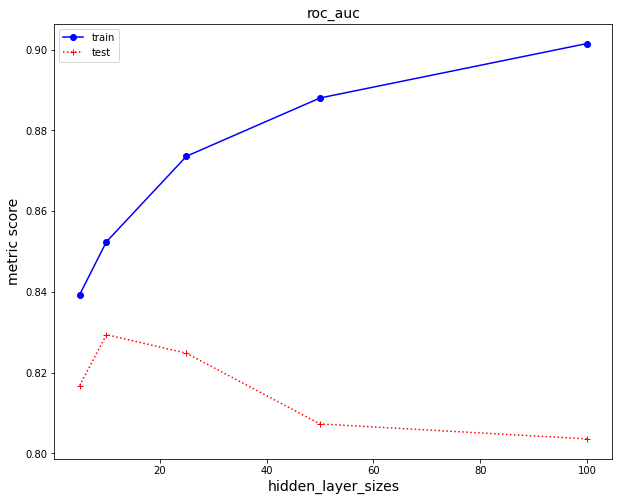

train neg_log_loss score: [-0.15941531 -0.15466571 -0.14609225 -0.13958504 -0.13313614]
test neg_log_loss score: [-0.1682459  -0.16630017 -0.16800607 -0.17642678 -0.18049225]


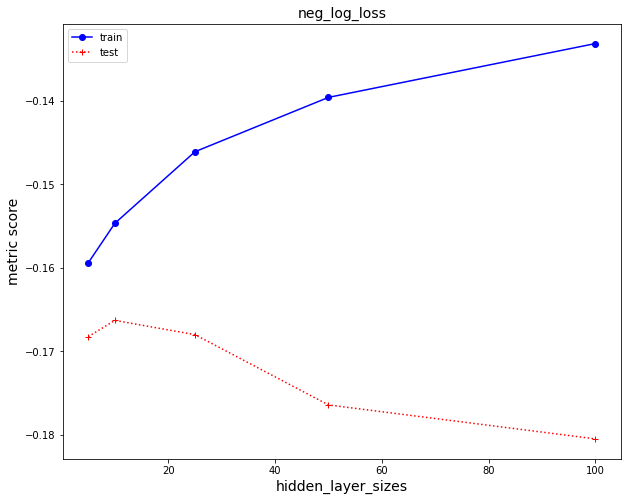

mean fit time: [1.95698915 1.77973342 2.25243306 3.36891823 4.11434388]


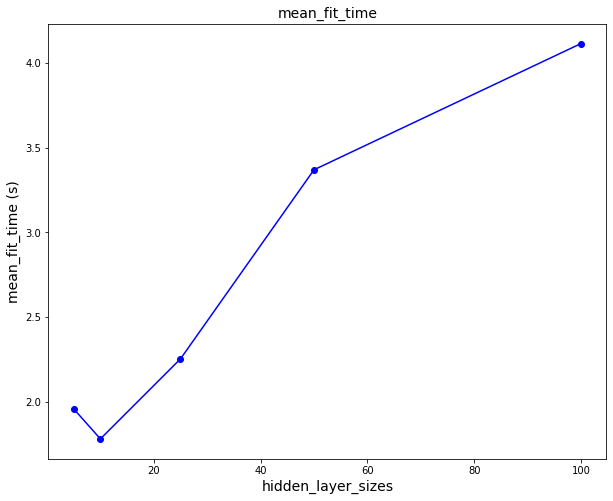

In [461]:
train_test(data, MLP(), {'hidden_layer_sizes':[5,10,25,50,100], 'max_iter':[1000]})

train roc_auc score: [0.85482674 0.87245244 0.86001474 0.71520736]
test roc_auc score: [0.81239819 0.81009954 0.8264237  0.69130419]


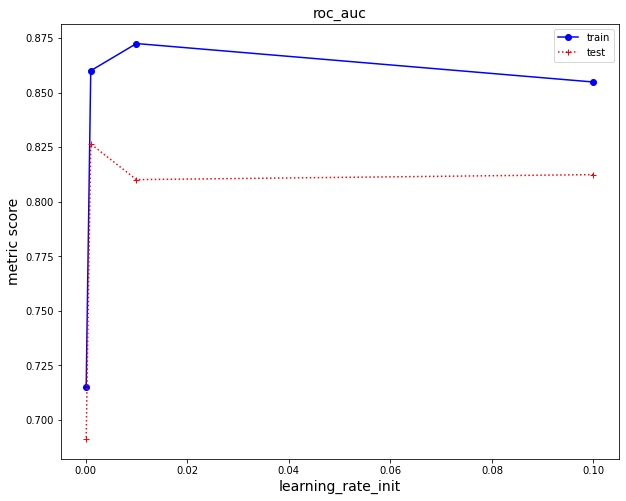

train neg_log_loss score: [-0.15507798 -0.14814568 -0.15199486 -0.18362405]
test neg_log_loss score: [-0.17176046 -0.17743609 -0.16552887 -0.18804046]


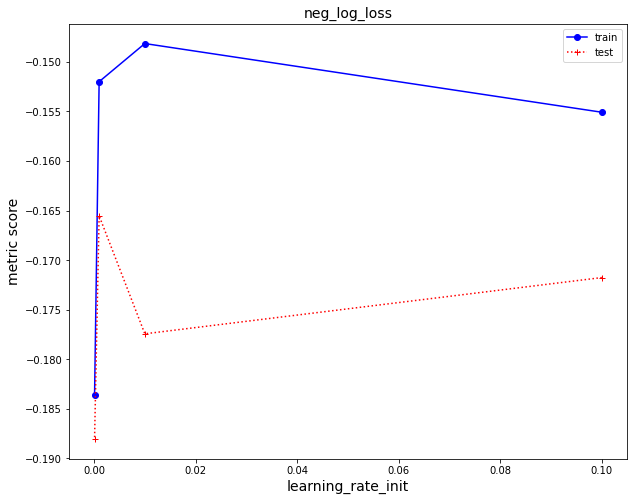

mean fit time: [0.32082834 0.78906131 1.83319693 2.54029584]


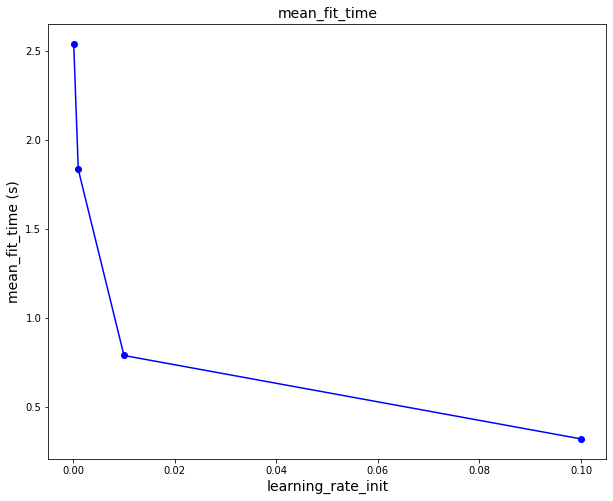

In [462]:
train_test(data, MLP(), {'hidden_layer_sizes':[10], 'max_iter':[1000],'learning_rate_init':[0.1,0.01,0.001,0.0001]})